/tmp/ipykernel_21057/2844035720.py:30: UserWarning: Log scale: values of z <= 0 have been masked
  cs0 = axs[0].contour(np.multiply(fast_flux, source_rate/volume), np.logspace(9, 16, 8), origin="lower",


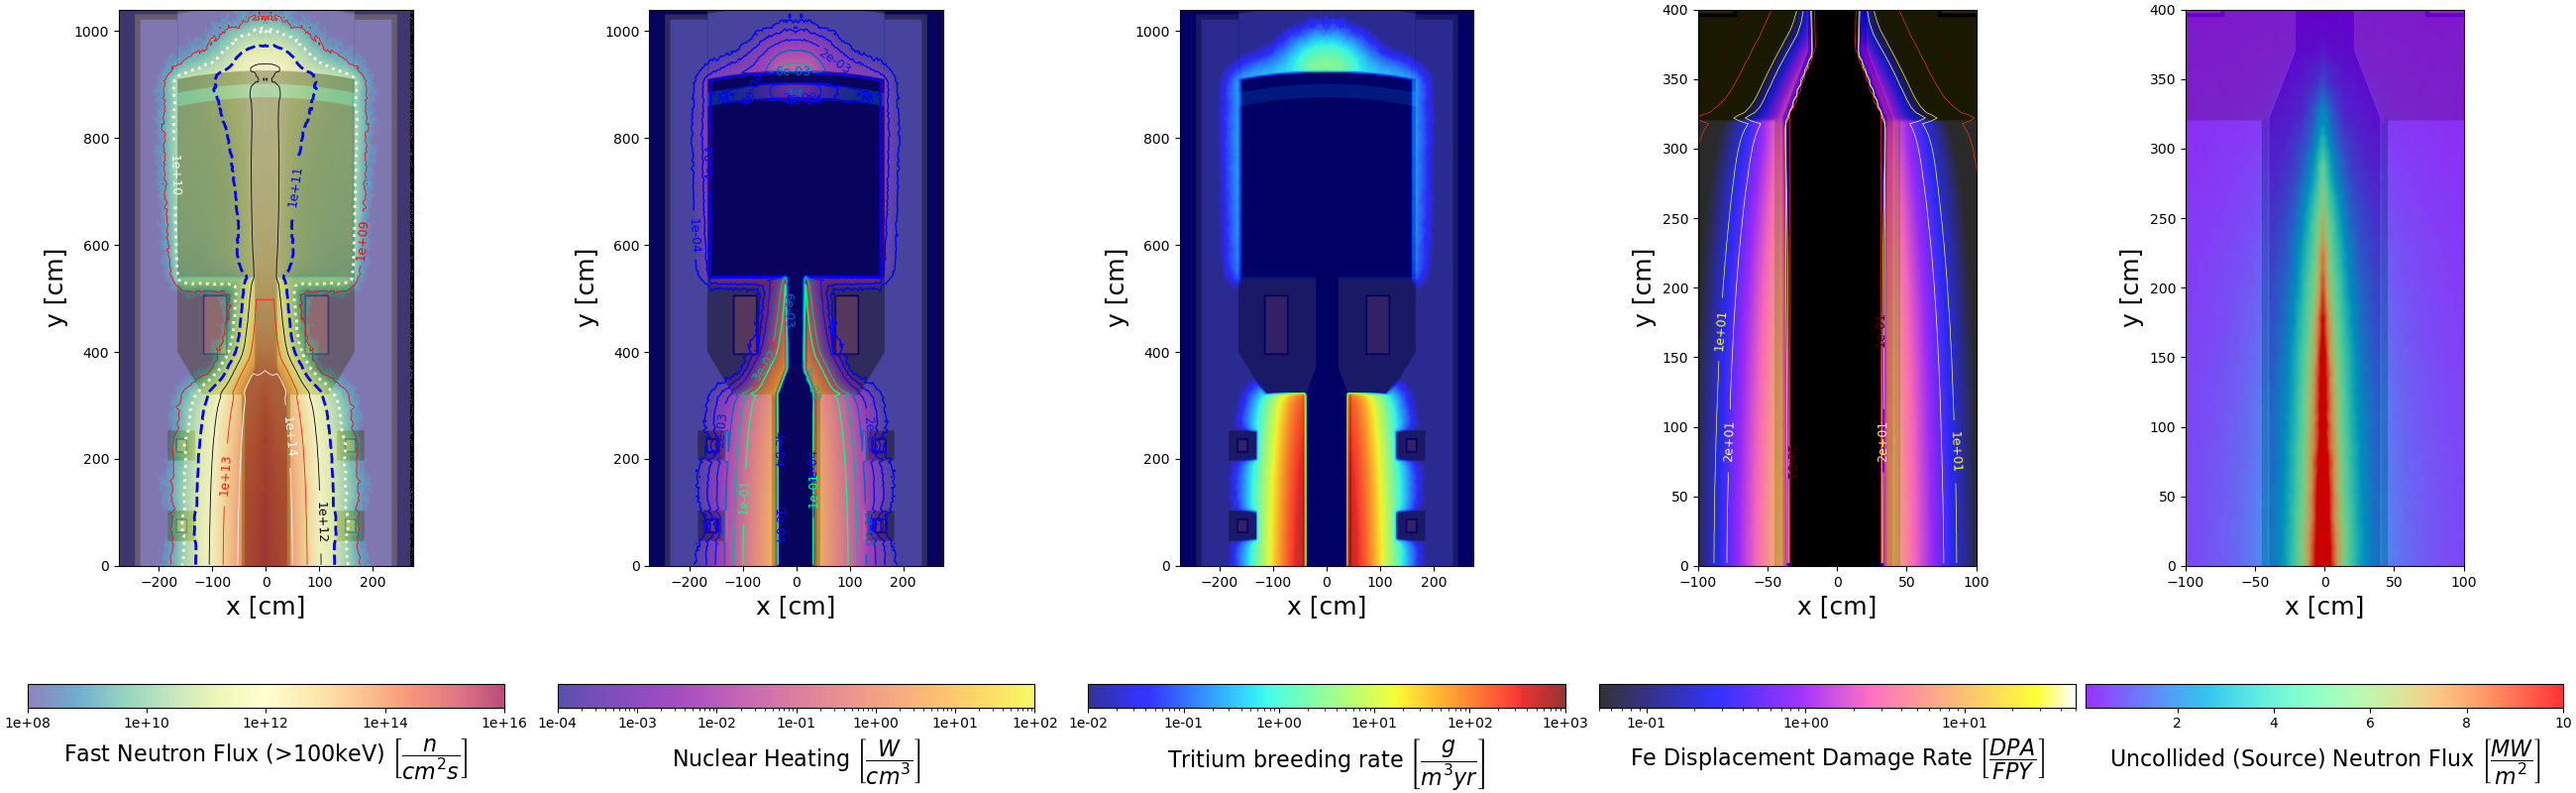

In [9]:
%matplotlib widget
from analysis import *
def plot_flux_heat_breed():
    source_rate = 3.55e18
    volume = 16
    # load data
    fast_flux_npzfile = np.load("plots/10-BAM-ALLW-FLIBE-REALSOURCE-V5/fast flux.npz")
    fast_flux = fast_flux_npzfile['arr_0']
    heat_npzfile = np.load("plots/10-BAM-ALLW-FLIBE-REALSOURCE-V5/neutron heat load.npz")
    heat = np.add(heat_npzfile['arr_0'], 1e-10)
    np.nan_to_num(heat, copy=False)
    breeder_npzfile = np.load("plots/10-BAM-ALLW-FLIBE-REALSOURCE-V5/Breeder mesh.npz")
    breed = np.add(breeder_npzfile['arr_0'], 1e-15)
    damage_npzfile = np.load("plots/10-BAM-ALLW-FLIBE-REALSOURCE-V5/neutron damage_energy.npz")
    damage = np.add(damage_npzfile['arr_0'], 1e-15)
    np.nan_to_num(damage, copy=False)
    vacuum_source_npzfile = np.load("plots/neutron_source.npz")
    vacuum_source = np.add(vacuum_source_npzfile['arr_0'], 1e-15)
    np.nan_to_num(vacuum_source)

    plot_extent = (-275, 275, 0, 260*4)
    fig, axs = plt.subplots(1, 5, layout="constrained")
    fig_scale = 2
    fig.set_size_inches(13*fig_scale, 4*fig_scale)
    psi, max_psi = draw_psi(draw=False)

    axs[0].imshow(background_image, extent=plot_extent)
    im0 = axs[0].imshow(np.multiply(fast_flux, source_rate/volume), cmap="Spectral_r", origin='lower', alpha=0.7, interpolation='quadric',
                        extent=plot_extent, norm=colors.LogNorm(vmin=1e8, vmax=1e16))
    cs0 = axs[0].contour(np.multiply(fast_flux, source_rate/volume), np.logspace(9, 16, 8), origin="lower",
                         extent=extent, cmap='flag', linewidths=0.6, norm=colors.LogNorm(vmin=1e9, vmax=1e16))
    cbar0 = fig.colorbar(im0, ax=axs[0], orientation="horizontal", shrink=1, format='%0.0e', pad=0.1)
    cbar0.set_label(r"Fast Neutron Flux (>100keV) $\left[\dfrac{n}{cm^2s}\right]$", fontsize=16)
    cbar0.ax.tick_params(labelsize=10)
    plt.clabel(cs0, fmt='%0.0e', fontsize=9)
    cs0.collections[1].set_linestyle('dotted')
    cs0.collections[1].set_linewidth(2)
    cs0.collections[2].set_linestyle('dashed')
    cs0.collections[2].set_linewidth(2)
    

    axs[1].imshow(background_image, extent=plot_extent)
    im1 = axs[1].imshow(np.multiply(heat, source_rate*1.602e-19/volume), cmap="plasma", origin='lower', alpha=0.7, interpolation='quadric',
                        extent=plot_extent, norm=colors.LogNorm(vmin=1e-4, vmax=1e2))
    cs1 = axs[1].contour(np.multiply(heat, source_rate*1.602e-19/volume), np.logspace(-4, -1, 6), origin="lower",
                         extent=extent, cmap='winter', linewidths=1, norm=colors.LogNorm(vmin=1e-3, vmax=1e-1))
    cbar1 = fig.colorbar(im1, ax=axs[1], orientation="horizontal", shrink=1, format='%0.0e', pad=0.1)
    cbar1.set_label(r'Nuclear Heating $\left[\dfrac{W}{cm^3}\right]$', fontsize=16)
    cbar1.ax.tick_params(labelsize=10)
    plt.clabel(cs1, fmt='%0.0e', fontsize=9)

    axs[2].imshow(background_image, extent=plot_extent)
    im2 = axs[2].imshow(np.multiply(breed, source_rate*6/6.0221408e23/volume*3600*24*365*1e6), cmap="jet", origin='lower', alpha=0.8, interpolation='quadric',
                        extent=plot_extent, norm=colors.LogNorm(vmin=1e-2, vmax=1e3))
    #cs2 = axs[2].contour(np.multiply(heat, source_rate/volume), np.logspace(9, 16, 12), origin="lower",
    #                     extent=extent, cmap='flag', linewidths=0.5)
    cbar2 = fig.colorbar(im2, ax=axs[2], orientation="horizontal", shrink=1, format='%0.0e', pad=0.1)
    cbar2.set_label(r'Tritium breeding rate $\left[\dfrac{g}{m^3yr}\right]$', fontsize=16)
    cbar2.ax.tick_params(labelsize=10)

    axs[3].imshow(background_image, extent=plot_extent)
    im3 = axs[3].imshow(np.multiply(damage, source_rate*0.8/(2*40)*3600*24*365/(volume*4.29129535/(55.845*1.66054E-24))), cmap="gnuplot2", origin='lower', alpha=0.8, interpolation='quadric',
                        extent=plot_extent, norm=colors.LogNorm(vmin=5e-2, vmax=50))
    cs3 = axs[3].contour(np.multiply(heat, source_rate*0.8/(2*40)*3600*24*365/(volume*4.29129535/(55.845*1.66054E-24))), [0.1, 1, 10, 20], origin="lower",
                         extent=extent, cmap='hot', linewidths=0.5, norm=colors.LogNorm(vmin=5e-2, vmax=50))
    cbar3 = fig.colorbar(im3, ax=axs[3], orientation="horizontal", shrink=1, format='%0.0e', pad=0.1)
    cbar3.set_label(r"Fe Displacement Damage Rate $\left[\dfrac{DPA}{FPY}\right]$", fontsize=16)
    cbar3.ax.tick_params(labelsize=10)
    axs[3].set_xlim((-100, 100))
    axs[3].set_ylim((0, 400))
    plt.clabel(cs3, fmt='%0.0e', fontsize=9)

    axs[4].imshow(background_image, extent=plot_extent)
    """
    axs[4].annotate("Mirror HTS Magnet",            [100, 460], [320, 450], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("Water Cooled Tungsten Shield", [75,  350], [320, 340], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("Liquid Immersion Blanket",     [200, 760], [320, 750], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("Direct Convertor/Bias Rings",  [0,   880], [320, 870], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("Tungsten Bioshield",           [240, 970], [320, 970], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("RAFM First Wall",              [42,  120], [320, 110], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("Central Coils",                [160, 225], [320, 220], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    axs[4].annotate("End Expander",                 [160, 610], [320, 600], fontsize=13, arrowprops=dict(arrowstyle='<|-', color='blue'))
    """
    im4 = axs[4].imshow(np.multiply(vacuum_source, source_rate/volume*14e6*1.602e-19/1e6*1e4), cmap="rainbow", origin='lower', alpha=0.8, interpolation='quadric',
                        extent=plot_extent, norm=colors.Normalize(vmin=1e-1, vmax=10))
    #cs4 = axs[4].contour(np.multiply(heat, source_rate/volume), np.linspace(0, 10, 10), origin="lower",
    #                     extent=extent, cmap='flag', linewidths=0.5)
    cbar4 = fig.colorbar(im4, ax=axs[4], orientation="horizontal", shrink=1, format='%0.0f', pad=0.1)
    cbar4.set_label(r'Uncollided (Source) Neutron Flux $\left[\dfrac{MW}{m^2}\right]$', fontsize=16)
    cbar4.ax.tick_params(labelsize=10)
    axs[4].set_xlim((-100, 100))
    axs[4].set_ylim((0, 400))
    
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_xlabel("x [cm]", fontsize=18)
        ax.set_ylabel("y [cm]", fontsize=18)

    #plt.tight_layout()
    fig.savefig("flux heat breed FLIBE.png", dpi=400)
    
    #plt.close('all')

    
plot_flux_heat_breed()
    

In [ ]:
plot_neutron_source("statepoint.10-BAM_REALSOURCE-VACUUM.h5")

In [ ]:
#plot_fast_flux(sp)
plot_result(sp, tally_name = 'fast flux', tally_score = 'flux', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'Spectral_r', 
            contour_lvl = np.logspace(9, 16, 12), plot_extent = extent, m_factor=source_rate/8,
            clabel = 'Fast neutron flux $[n/cm^2-s]$', title = 'DT Fast Flux (>100 keV)\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_photon_flux(sp)
plot_result(sp, tally_name = 'photon flux', tally_score = 'flux', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'viridis',
            contour_lvl = np.logspace(8, 15, 12), plot_extent = extent, m_factor=source_rate/8,
            clabel = 'Photon flux $[\gamma/cm^2-s]$', title = 'Photon Flux\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_damage_energy(sp)
plot_result(sp, tally_name = 'neutron damage_energy', tally_score = 'damage-energy', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'Spectral_r',
            contour_lvl = np.logspace(8, 15, 12), plot_extent = extent, m_factor=source_rate/8,
            clabel = 'Neutron Damage Energy $[eV/s]$', title = ' Neutron Damage Energy Rate\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_total_heat(sp)
plot_result(sp, tally_name = "neutron heat load", tally_score = 'heating', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'Spectral_r',
            contour_lvl = np.logspace(-5, 1, 10), plot_extent = extent, m_factor= source_rate/8,
            clabel = 'Total Nuclear Heating $[W/cm^3]$', title = 'DT Neutron Nuclear Heating with Gamma\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_thermal_flux(sp)

In [ ]:
#plot_epithermal_flux(sp)
plot_result(sp, tally_name = "epithermal flux", tally_score = 'flux', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'Spectral_r',
            contour_lvl = np.logspace(10, 17, 16), plot_extent = extent, m_factor= source_rate/8,
            clabel = 'Epithermal neutron flux $[n/cm^2-s]$', title = 'DT Epithermal Flux (0.5 eV - 100 keV)\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_absorption(sp)
plot_result(sp, tally_name = "neutron absorption", tally_score = 'absorption', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'viridis',
            contour_lvl = np.logspace(9, 19, 14), plot_extent = extent, m_factor= source_rate/8,
            clabel = 'Neutron absorption $[#/cm^3-s]$', title = 'Neutron Absorption\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
get_tbr(sp)

In [ ]:
plot_result(sp, tally_name = "neutron damage_energy", tally_score = 'damage-energy', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'viridis',
            contour_lvl = np.logspace(13, 19, 10), plot_extent = extent, m_factor= source_rate,
            clabel = 'Neutron Damage Energy $[eV/s]$', title = 'Neutron Damage Energy Rate\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
plot_result(sp, tally_name = "neutron damage_energy", tally_score = 'damage-energy', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'viridis',
            contour_lvl = np.logspace(-6, -1, 10), plot_extent = extent, m_factor= source_rate/16/1e6*0.8/(2*40*1e24)*3600*24*365,
            clabel = 'Neutron DPA Rate $[DPA]$', title = 'Neutron DPA Rate\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
plot_coil_flux_energy(sp)

In [ ]:
#plot_multiplying_flux(sp)
plot_result(sp, tally_name = "Pb multiplying flux", tally_score = 'flux', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'plasma',
            contour_lvl = np.logspace(5, 15, 14), plot_extent = extent, m_factor= source_rate/8,
            clabel = 'Fast neutron flux $[n/cm^2-s]$', title = 'Fast Neutron Flux > 5 MeV for Multiplication\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_breeding(sp)
plot_result(sp, tally_name = "Breeder mesh", tally_score = '(n,Xt)', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'plasma',
            contour_lvl = np.logspace(6, 13, 14), plot_extent = extent, m_factor= source_rate/8,
            clabel = '(n, Xt) rate $[1/cm^3-s]$', title = '(n, Xt) Breeding Sites\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_n2n(sp)
plot_result(sp, tally_name = "Multiplier mesh", tally_score = '(n,2n)', mesh_dims = mesh_shape, save_aggregate = True, im_cmap = 'plasma',
            contour_lvl = np.logspace(6, 13, 14), plot_extent = extent, m_factor= source_rate/8,
            clabel = '(n, 2n) rate $[1/cm^3-s]$', title = '(n, 2n) Multiplication Sites\n'+ source_rate_title + subtitle, savedir=plot_dir)

In [ ]:
#plot_n3n(sp)